<a href="https://colab.research.google.com/github/pinballsurgeon/deluxo_adjacency/blob/main/tf_quantum_svgCircuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install cirq

!pip install tensorflow_quantum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.5 MB 16.1 MB/s 
     |████████████████████████████████| 1.6 MB 35.3 MB/s 
     |████████████████████████████████| 6.1 MB 6.1 MB/s 
     |████████████████████████████████| 576 kB 46.2 MB/s 
     |████████████████████████████████| 100 kB 6.2 MB/s 
     |████████████████████████████████| 90 kB 10.3 MB/s 
     |████████████████████████████████| 90 kB 8.9 MB/s 
     |████████████████████████████████| 641 kB 56.1 MB/s 
     |████████████████████████████████| 541 kB 52.2 MB/s 
     |████████████████████████████████| 541 kB 60.0 MB/s 
     |████████████████████████████████| 437 kB 60.3 MB/s 
     |████████████████████████████████| 93 kB 2.0 MB/s 
     |████████████████████████████████| 93 kB 1.6 MB/s 
     |████████████████████████████████| 93 kB 1.7 MB/s 
     |████████████████████████████████| 93 kB 1.7 MB/s 
     |████████████████████████████████| 93 

In [14]:
import cirq
import sympy
import tensorflow
import numpy


from cirq.contrib.svg import SVGCircuit

import tensorflow_quantum

In [3]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout
    
    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


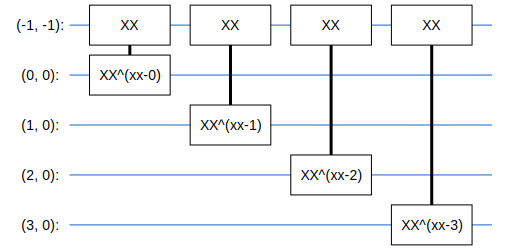

In [4]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(4,1),
                                   readout=cirq.GridQubit(-1,-1))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.XX, prefix='xx')
SVGCircuit(circuit)

In [5]:
def create_quantum_model():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(4, 4)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()
    
    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))
    
    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [6]:
model_circuit, model_readout = create_quantum_model()

In [10]:
# Build the Keras model.
model = tensorflow.keras.Sequential([
    # The input is the data-circuit, encoded as a tf.string
    tensorflow.keras.layers.Input(shape=(), dtype=tensorflow.string),
    # The PQC layer returns the expected value of the readout gate, range [-1,1].
    tensorflow_quantum.layers.PQC(model_circuit, model_readout),
])

In [13]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

11501568/11490434 [==============================] - 0s 0us/step


NameError: ignored

In [11]:
y_train_hinge = 2.0*y_train_nocon-1.0
y_test_hinge = 2.0*y_test-1.0

NameError: ignored